In [1]:
import numpy as np  #Cálculo numérico eficiente (arreglos y funciones matemáticas)
import matplotlib.pyplot as plt  #Generación de gráficos y visualizaciones
import pandas as pd  #Manejo y análisis de datos con DataFrames
import sympy as sp  #Cálculo simbólico (derivadas, series de Taylor, álgebra)
from math import factorial  #Función factorial del módulo matemático estándar

x = sp.symbols('x') # Creamos la variable simbólica x

def evaluacion(values, f, P):
    lista = []  # Lista donde se guardarán los resultados  
    for i in values:  # Recorremos cada valor de x en la lista dada
        lista.append([
            i,                  # Valor de x
            f(i),               # Valor real de la función en x
            P(i),               # Valor aproximado usando el polinomio de Taylor
            abs(f(i) - P(i)),   # Error absoluto |f(x) - P(x)|
            abs((f(i) - P(i)) / f(i))  # Error relativo
        ]) 
    # Convertimos la lista en un DataFrame para mostrar los resultados organizados
    lista = pd.DataFrame(data=lista, columns=['values_x', 'f(x)', 'P(x)', '|f(x)-P(x)|', 'E_r'])
    return lista  # Retornamos la tabla con los resultados

def Taylor_serie(f, x0, n):
    """
    Calcula el polinomio de Taylor de orden n
    de una función simbólica f centrado en x0.
    
    Parámetros:
    f  -> función simbólica (ej: sp.sin(x))
    x0 -> punto donde se centra la serie
    n  -> orden del polinomio
    
    Retorna:
    Polinomio de Taylor expandido
    """
    polinomio = 0  # Inicializamos el polinomio en 0
    for k in range(n + 1): # Recorremos desde k = 0 hasta k = n
        df = sp.diff(f, x, k) # Calculamos la derivada k-ésima de la función
        df_eval = sp.lambdify(x, df) # Convertimos la derivada simbólica en función evaluable
        valor_derivada = df_eval(x0) # Evaluamos la derivada en el punto x0
        # Construimos el término:
        # (f^(k)(x0) / k!) * (x - x0)^k
        termino = (valor_derivada / factorial(k)) * (x - x0)**k
        polinomio += termino # Sumamos el término al polinomio
    return sp.expand(polinomio) # Expandimos el polinomio para simplificarlo


# Polinomio de Taylor de grado 3

Sea la función:

$$
f(x) = e^{2x}\sin(x)
$$

Alrededor de:

$$
x_0 = \pi
$$

Se pide:

1. Determinar el polinomio de grado 3.
2. Aproximar $P(1)$ y $P(4.5)$.
3. Calcular el error absoluto y relativo.
4. Determinar la cota del error $R_3(1)$.
5. Graficar la función y los polinomios de grado 1, 2, 4 y 6.

In [2]:
g = sp.exp(2*x)*sp.sin(x)  # Definimos la función g(x) = e^(2x) * sin(x)
P = Taylor_serie(g, np.pi, 3)  # Calculamos el polinomio de Taylor de grado 3 centrado en x0 = π
x_values = [1, 4.5]  # Definimos los valores de x donde queremos evaluar: x = 1 y x = 4.5
evaluacion(x_values, sp.lambdify(x, g), sp.lambdify(x, P))  # lambdify convierte expresiones simbólicas en funciones numéricas evaluables

,values_x,f(x),P(x),|f(x)-P(x)|,E_r
0,1.0,6.217676,5877.661957,5871.444281,944.314883
1,4.5,-7921.008585,-5164.514431,2756.494154,0.347998


In [3]:
x = sp.symbols('x') # Creamos la variable simbólica x
# Calculamos la segunda derivada de F respecto a x
# El tercer argumento (2) significa que derivamos 2 veces
y_prime = sp.diff(g, x, 4)
y_prime

(-7*sin(x) + 24*cos(x))*exp(2*x)

## Resto de Taylor (Forma de Lagrange)

El error al aproximar una función mediante su polinomio de Taylor de grado $n$ está dado por:

$$
R_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x - x_0)^{n+1}
$$

donde:

- $f^{(n+1)}$ es la derivada de orden $n+1$.
- $\xi$ es algún punto entre $x$ y $x_0$.
- $(n+1)!$ es el factorial.
- $x_0$ es el punto donde se centra la serie.

In [4]:
# Declaramos la variable simbólica
x = sp.symbols('x')

def cota_truncamiento(f, n, xo, x_point):
    """
    Calcula una aproximación de la cota del error
    del polinomio de Taylor de orden n.
    
    Parámetros:
    f        -> función simbólica (SymPy)
    n        -> orden del polinomio de Taylor
    xo       -> punto donde se centra el polinomio
    x_point  -> punto donde queremos estimar el error
    
    Retorna:
    cota aproximada del error de truncamiento
    """
    
    # 1️⃣ Calculamos la derivada de orden (n+1)
    df = sp.diff(f, x, n+1)
    
    # 2️⃣ Convertimos la expresión simbólica en función numérica
    #    para poder evaluarla con valores reales (NumPy)
    df_eval = sp.lambdify(x, df)
    
    # 3️⃣ Creamos 200 puntos entre xo y x_point
    #    (esto nos permite aproximar el máximo de la derivada)
    x_array = np.linspace(min(xo, x_point), max(xo, x_point), 200)
    
    # 4️⃣ Evaluamos la derivada en todos esos puntos
    #    df_eval(x_array) devuelve un arreglo
    #    abs(...) toma el valor absoluto elemento por elemento
    #    max(...) obtiene el valor máximo
    maximo = max(abs(df_eval(x_array)))
    
    # 5️⃣ Aplicamos la fórmula de la cota del error:
    #
    #     |R_n(x)| ≤ M * |x - xo|^(n+1) / (n+1)!
    #
    # donde M es el máximo de la derivada (n+1)
    cota = maximo * (abs(xo - x_point) ** (n+1) / factorial(n+1))
    
    # 6️⃣ Retornamos la cota calculada
    return cota

In [5]:
cota_truncamiento(g, 3, np.pi, 1)

np.float64(11264.195548176733)

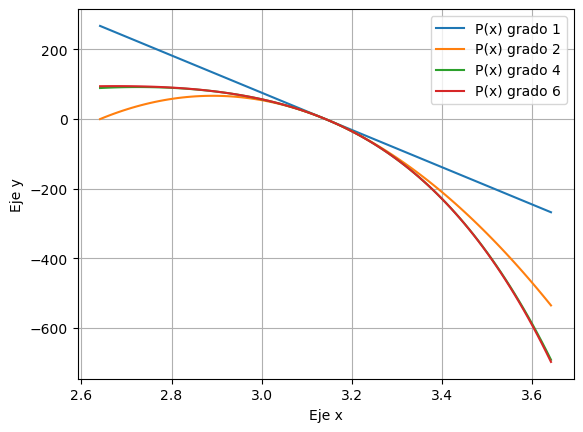

In [6]:
grados = [1, 2, 4, 6] # Lista de grados del polinomio de Taylor que queremos graficar
xo = np.pi # Punto alrededor del cual se hace el desarrollo de Taylor

def graficas_polinomio(g, xo, grados):
    """
    Grafica varios polinomios de Taylor de distintos grados
    centrados en xo para una función g.
    
    Parámetros:
    g       -> función simbólica (SymPy)
    xo      -> punto de expansión (centro del Taylor)
    grados  -> lista con los grados del polinomio a graficar
    """
    
    # Definimos qué tan lejos del punto xo queremos graficar
    # Aquí se graficará en el intervalo [xo - 0.5, xo + 0.5]
    delta = 0.5
    
    # Creamos 100 puntos en ese intervalo
    # Esto servirá para evaluar y dibujar las curvas
    ux = np.linspace(xo - delta, xo + delta, 100)
    
    # Recorremos cada grado de la lista
    for i in grados:
        P_x = Taylor_serie(g, xo, i) # Calculamos el polinomio de Taylor de grado i
        Peval = sp.lambdify(x, P_x)(ux) # Convertimos el polinomio simbólico en función numérica y lo evaluamos en todos los puntos del arreglo ux
        plt.plot(ux, Peval, label=f'P(x) grado {i}') # Graficamos el polinomio
        plt.legend() # Mostramos la leyenda
    plt.grid() # Activamos la cuadrícula
    plt.xlabel('Eje x') # Etiquetas de los ejes
    plt.ylabel('Eje y')
    plt.show() # Mostrar la gráfica
    return

# Llamamos la función para generar la gráfica
graficas_polinomio(g, xo, grados)

## Ejercicio

Aproximar la integral

$$
\int_{1}^{\pi} f(x)\,dx
$$

usando el polinomio de Taylor de grado 3 y calcular los errores.

In [7]:
import sympy as sp
import numpy as np

x = sp.symbols('x') # Definimos la variable simbólica
g = sp.exp(2*x) * sp.sin(x) # Definimos la función g(x) = e^(2x) * sin(x)

# Calculamos el polinomio de Taylor de grado 3
# centrado en x0 = pi
P_3 = Taylor_serie(g, np.pi, 3)

# Calculamos la integral exacta (analítica) de la función original
# en el intervalo [1, pi]
integral_analitica = sp.integrate(g, (x, 1, np.pi))

print(f'El valor de la integral analítica es {float(integral_analitica)}') # Mostramos el valor numérico de la integral exacta

# Calculamos la integral del polinomio de Taylor
# (esto es la aproximación de la integral original)
integral_aproximada = sp.integrate(P_3, (x, 1, np.pi))

print(f'El valor de la integral aproximada es {float(integral_aproximada)}') # Mostramos el valor numérico de la integral aproximada

El valor de la integral analítica es 105.40972538969403
El valor de la integral aproximada es 2884.265317350346


Aproximar $$f'(1)$$ usando el polinomio de Taylor de grado 3 y calcular los errores.

In [8]:
import sympy as sp  # Librería para cálculo simbólico
import numpy as np  # Librería numérica

x = sp.symbols('x')  # Definimos la variable simbólica
f = sp.exp(2*x)*sp.sin(x)  # Definimos la función f(x)=e^(2x)sin(x)
xo = np.pi  # Punto donde se centra el polinomio de Taylor
P3 = Taylor_serie(f, xo, 3)  # Calculamos el polinomio de Taylor de grado 3
f_deriv = sp.diff(f, x)  # Derivada exacta de la función
P3_deriv = sp.diff(P3, x)  # Derivada del polinomio de Taylor
valor_real = f_deriv.subs(x, 1)  # Evaluamos la derivada exacta en x=1
valor_aprox = P3_deriv.subs(x, 1)  # Evaluamos la derivada del polinomio en x=1
error_real = abs(valor_real - valor_aprox)  # Calculamos el error real

print("Valor real f'(1):", float(valor_real))  # Mostramos el valor exacto
print("Valor aproximado con P3'(1):", float(valor_aprox))  # Mostramos la aproximación
print("Error real:", float(error_real))  # Mostramos el error

Valor real f'(1): 16.427676673177206
Valor aproximado con P3'(1): -9456.212017807618
Error real: 9472.639694480795


In [9]:
import sympy as sp

x = sp.symbols('x')
f = sp.exp(2*x) * sp.sin(x)
n = 3
x_0 = np.pi
P_3 = Taylor_serie(f, x_0, n)
P_3 

-981.734701795402*x**3 + 8181.64826975427*x**2 - 22874.30445193*x + 21552.0528413474